In the vibrant world of music, the complexity of attributes such as artist name, popularity, danceability, energy, key, and others, presents unique challenges and opportunities. This study aims to delve into these nuances using dimensionality reduction, a key technique in unsupervised learning, to decode and simplify the multifaceted nature of music data.

Dimensionality reduction is more than a tool for data simplification; it's a means to uncover hidden structures in music datasets. It enables us to identify underlying patterns and relationships between various musical elements, which might be obscured in high-dimensional data.

Utilizing a comprehensive dataset, we explore and evaluate techniques like Principal Component Analysis (PCA) and Multiple Correspondence Analysis (MCA). These methods are instrumental in capturing the essence of music, allowing us to gain insights into musical trends and artist styles.

Our goal is to apply these techniques and assess their efficacy in revealing music's inherent structures. Through this study, we aim to contribute to musicology and data science, enhancing the understanding and appreciation of the rich, multi-dimensional world of music.

The initial phase of the analysis involves loading the data. For this purpose, the music dataset, sourced from Kaggle's MusicNet Dataset, is utilized. The original dataset file, subsequently renamed to "train.csv", is loaded into a DataFrame named "dane" for further processing and analysis.

Data Loading and Initial Display:

The dataset is loaded using Pandas.Initial rows of the dataset are displayed for a quick overview.

In [1]:
import pandas as pd
import numpy as np

The first step is loading dataset and review. I am going to expalin step by step:

Data Loading: The dataset is loaded into a Pandas DataFrame from a CSV file.

Index Setting: The first column of the dataset is set as the index of the DataFrame, implying that this column contains unique identifiers for each row (likely the track names or IDs).

Column Removal: Specific columns, namely "key", "Artist Name", "mode", and "Class", are removed from the DataFrame. This step suggests a focus on numerical features related to the musical characteristics of the tracks, such as popularity, danceability, energy, etc., for further analysis.

Data Preview: The script concludes by displaying the first few rows of the modified DataFrame, providing a glimpse into the processed dataset.

In [2]:
import pandas as pd

# Reading the CSV file
dane = pd.read_csv("train.csv")

# Setting the first column as row names
dane.index = dane.iloc[:, 0]

# Dropping certain columns
drop_columns = ["key", "Artist Name", "mode", "Class"]
dane = dane.drop(columns=drop_columns)

# Displaying the first few rows of the dataframe
print(dane.head())


                       Popularity  danceability  energy  acousticness  \
Artist Name                                                             
Bruno Mars                   60.0         0.854   0.564      0.017100   
Boston                       54.0         0.382   0.814      0.001100   
The Raincoats                35.0         0.434   0.614      0.486000   
Deno                         66.0         0.853   0.597      0.021200   
Red Hot Chili Peppers        53.0         0.167   0.975      0.000169   

                       instrumentalness  liveness  valence    tempo  
Artist Name                                                          
Bruno Mars                          NaN    0.0849   0.8990  134.071  
Boston                         0.004010    0.1010   0.5690  116.454  
The Raincoats                  0.000196    0.3940   0.7870  147.681  
Deno                                NaN    0.1220   0.5690  107.033  
Red Hot Chili Peppers          0.016100    0.1720   0.0918  199.060 

Then, we need look at  the code  which is designed to provide an initial assessment of the dataset's structure, missing values, and basic statistical properties, laying the groundwork for more detailed analysis or preprocessing.The key steps in this analysis include:

Observations and Variables Count: The script starts by printing the total number of observations (rows) and variables (columns) in the dataset, providing an overview of its size and dimensionality.

Missing Value Analysis: It calculates and displays the percentage of missing values in each column. This step is crucial for understanding data completeness and identifying columns that might need imputation or further attention.

Descriptive Statistics: Finally, the code generates and displays a summary of descriptive statistics for the dataset. This summary includes measures like mean, standard deviation, minimum, and maximum values for each numerical column, offering insights into the distribution and scale of the data.


We need to understand Descriptive Statistics:

Popularity: Ranges from 1 to 100, with a mean of 44.51 and a standard deviation of 17.43. This suggests a moderate average popularity with a wide spread in values.

Danceability:Values span from 0.0596 to 0.989, with a mean of 0.543, suggesting a moderate tendency towards danceable tracks.

Energy:Varies between 0.00002 to 1, with an average of 0.663, indicating a general trend towards energetic tracks.

Acousticness:Extends from 0 to 0.996, with an average of 0.247, showing a broad range of acoustic properties among tracks.

Instrumentalness:Has a wide spread (0 to 0.996), with a mean of 0.178, indicating a mix of instrumental and vocal tracks.

Liveness:Ranges from 0 to 1, with an average of 0.196, suggesting most tracks have low live audience presence.

Valence:Spans from 0 to 0.986, with a mean of 0.486, indicating a balanced distribution of mood in tracks.

Tempo:Ranges from 59.52 to 217.416 BPM, with an average of 122.62 BPM, showing a wide variety of tempos.

In [3]:
import pandas as pd

# Assuming 'dane' is already defined as a pandas DataFrame

# Printing the number of observations (rows)
print("Number of observations in the dataset:", len(dane))

# Printing the number of variables (columns)
print("Number of variables in the analysis:", dane.shape[1])

# Calculating the percentage of missing values in each column
missing_in_cols = dane.isna().mean() * 100

# Displaying the percentage of missing values
print(missing_in_cols)

# Displaying a summary of the dataframe
print(dane.describe())


Number of observations in the dataset: 17996
Number of variables in the analysis: 8
Popularity           2.378306
danceability         0.000000
energy               0.000000
acousticness         0.000000
instrumentalness    24.322072
liveness             0.000000
valence              0.000000
tempo                0.000000
dtype: float64
         Popularity  danceability        energy  acousticness  \
count  17568.000000  17996.000000  17996.000000  17996.000000   
mean      44.512124      0.543433      0.662777      0.247082   
std       17.426928      0.166268      0.235373      0.310632   
min        1.000000      0.059600      0.000020      0.000000   
25%       33.000000      0.432000      0.509000      0.004300   
50%       44.000000      0.545000      0.700000      0.081400   
75%       56.000000      0.659000      0.860000      0.434000   
max      100.000000      0.989000      1.000000      0.996000   

       instrumentalness      liveness       valence         tempo  
count  

A heatmap is created to visualize missing data, showing the absence of data points across various attributes for different artists. The heatmap indicates instrumentalness as the feature with the most missing values.

Distribution Analysis: Histograms for each numerical attribute are plotted to analyze their distributions. This would give insights into the commonality of different musical qualities within the dataset, such as whether most songs are danceable or more on the energetic side.

The second histograms presentes visualize the distribution of several musical features within the dataset:

Popularity: The distribution of popularity scores appears to be approximately normally distributed, with a central tendency around 40 to 60. This indicates that most tracks have moderate popularity.

Danceability: The danceability scores are also approximately normally distributed, suggesting a balance in the dataset between tracks suited for dancing and those that are not.

Energy: The energy feature shows a right-skewed distribution, with a concentration of tracks having higher energy levels.
Acousticness: Most tracks have low acousticness with a sharp peak close to zero, indicating that few tracks are purely acoustic.

Instrumentalness: There's a large peak at the lower end, suggesting that a majority of tracks contain vocal content and are not purely instrumental.

Liveness: The liveness feature is heavily skewed to the left, with most tracks having a lower liveness score, indicating that live recordings are less common in this dataset.

Valence: The valence scores are somewhat normally distributed, which means there is a variety of tracks ranging from sad to happy.

Tempo: The tempo of tracks shows a distribution that peaks around the middle range, which might suggest a preference for certain tempos in music production or selection for this dataset.

These distributions provide insights into the musical characteristics of the dataset, which could be leveraged for tasks such as genre classification, mood analysis, or creating tailored playlists.

                       Popularity  danceability  energy  acousticness  \
Artist Name                                                             
Bruno Mars                   60.0         0.854   0.564      0.017100   
Boston                       54.0         0.382   0.814      0.001100   
The Raincoats                35.0         0.434   0.614      0.486000   
Deno                         66.0         0.853   0.597      0.021200   
Red Hot Chili Peppers        53.0         0.167   0.975      0.000169   

                       instrumentalness  liveness  valence    tempo  
Artist Name                                                          
Bruno Mars                          NaN    0.0849   0.8990  134.071  
Boston                         0.004010    0.1010   0.5690  116.454  
The Raincoats                  0.000196    0.3940   0.7870  147.681  
Deno                                NaN    0.1220   0.5690  107.033  
Red Hot Chili Peppers          0.016100    0.1720   0.0918  199.060 

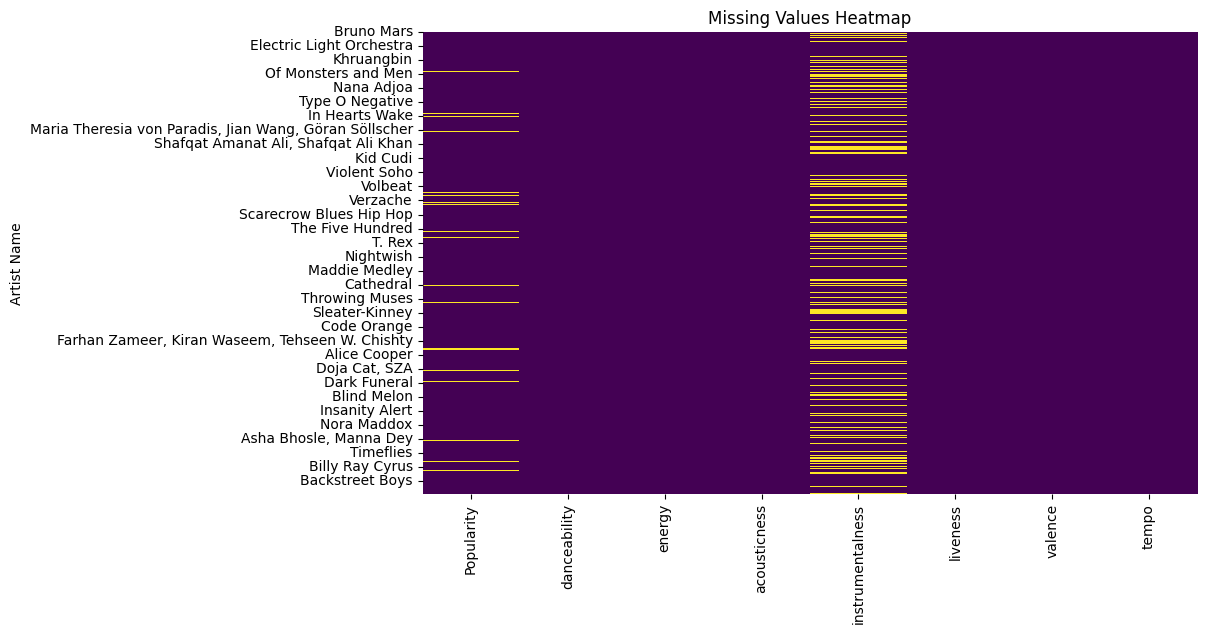

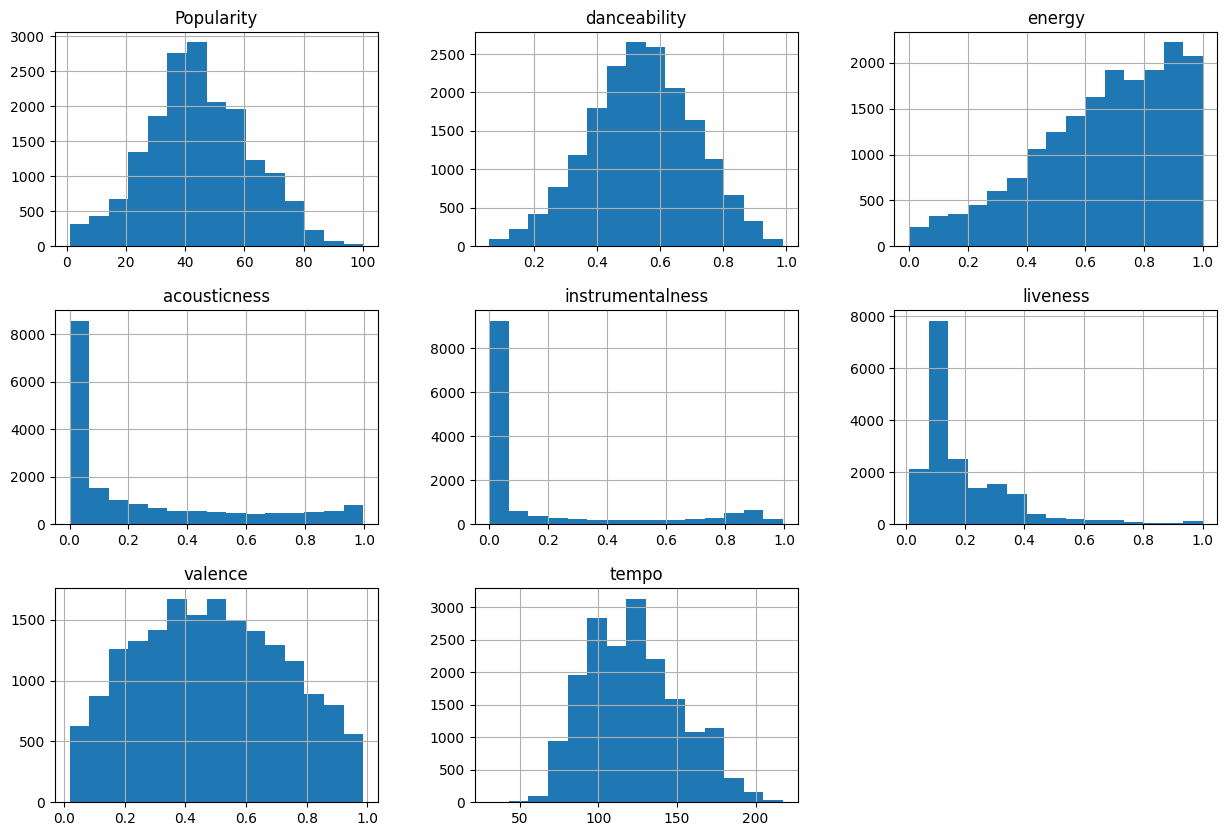

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dane' is our DataFrame

# Display the first few rows as a table
print(dane.head())

# Summary statistics table
print(dane.describe())

# Visualizing missing values
plt.figure(figsize=(10,6))
sns.heatmap(dane.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Histograms for each numerical feature
dane.hist(bins=15, figsize=(15, 10))
plt.show()


The visualization is a correlation matrix heatmap which displays the Pearson correlation coefficients between pairs of variables in the music dataset:

Popularity has a slight positive correlation with danceability (0.17) but shows little to no correlation with other features.

Danceability and valence show a moderate positive correlation (0.44), suggesting that more danceable tracks tend to have a happier or more positive mood.

Energy and acousticness are strongly negatively correlated (-0.75), indicating that tracks with higher energy tend to be less acoustic.

Acousticness shows negative correlations with danceability and energy, and a slight positive correlation with instrumentalness (0.17).

Instrumentalness does not show strong correlations with other features, but it has a slight negative correlation with danceability and energy.

Liveness, valence, and tempo show very little correlation with other features, indicating that these properties act independently of the others in this dataset.

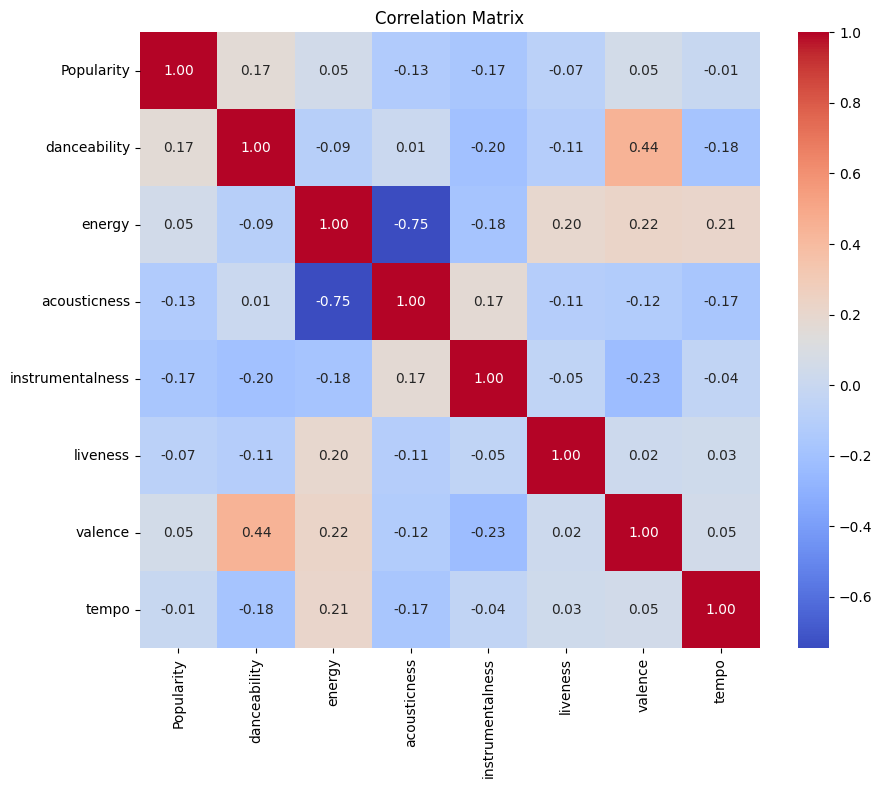

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dane' is our DataFrame

# Calculating the correlation matrix
cor_matrix = dane.corr(method='pearson')

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Eigenvalues Output:

The eigenvalues for each PCA component (total 8 components) were extracted, ranging from 2.049181 for the first component to 0.222283 for the eighth component.
These eigenvalues represent the amount of variance captured by each principal component.

Interpretation:

The first component captures the most variance (2.049181), and each subsequent component accounts for progressively less variance.
Typically, components with higher eigenvalues are considered more significant. In our case, the first few components are the most informative.

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
file_path = 'train.csv'  # Replace with our actual file path
dane = pd.read_csv(file_path)

# Dropping non-numeric columns
drop_columns = ["key", "Artist Name", "mode", "Class"]  # Replace with our non-numeric columns
dane_numeric = dane.drop(columns=drop_columns)

# Handling missing values by filling them with the mean of the column
dane_numeric.fillna(dane_numeric.mean(), inplace=True)

# Standardizing the dataset
scaler = StandardScaler()
dane_scaled = scaler.fit_transform(dane_numeric)

# Applying PCA
pca = PCA(n_components=min(dane_scaled.shape[0], dane_scaled.shape[1]))  # Adjust the number of components
data_pca = pca.fit_transform(dane_scaled)

# Extracting the eigenvalues
eigenvalues = pca.explained_variance_

# Creating a DataFrame to display the eigenvalues
eigenvalues_df = pd.DataFrame({
    'Component': range(1, len(eigenvalues) + 1),
    'Eigenvalue': eigenvalues
})

# Displaying the DataFrame
print(eigenvalues_df)


   Component  Eigenvalue
0          1    2.049181
1          2    1.601518
2          3    1.030676
3          4    0.943828
4          5    0.879239
5          6    0.790618
6          7    0.483100
7          8    0.222283


PCA Preparation:

The dataset was prepared by removing specified non-numeric columns ('key', 'Artist Name', 'mode', 'Class') and imputing missing values with the column means.

PCA Execution:

PCA was conducted on the numeric data, and eigenvalues were calculated for each principal component without limiting the number of components.

Scree Plot Analysis:

The scree plot reveals that the eigenvalues decline sharply after the first component and then level off after the third, indicating that most of the variance is captured within the first few components.

There is a significant drop after the first component, suggesting it accounts for the majority of the variance within the data.

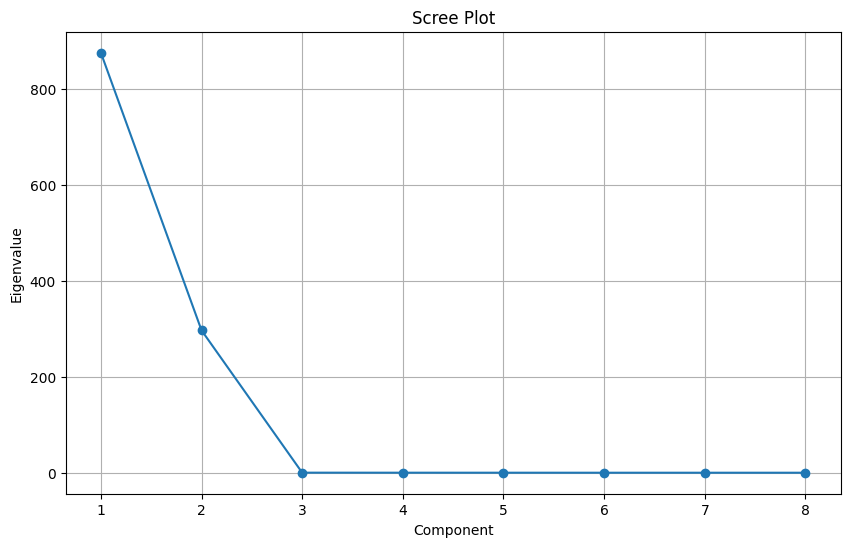

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Load the dataset
file_path = 'train.csv'  
dane = pd.read_csv(file_path)

# Dropping specified columns
drop_columns = ["key", "Artist Name", "mode", "Class"]
dane_numeric = dane.drop(columns=drop_columns)

# Handling missing values by filling them with the mean of the column
dane_numeric.fillna(dane_numeric.mean(), inplace=True)

# Performing PCA
pca = PCA()
pca.fit(dane_numeric)

# Calculating eigenvalues from the PCA components
eigenvalues = pca.explained_variance_

# Creating a DataFrame for components and their corresponding eigenvalues
eigenvalues_df = pd.DataFrame({'Component': range(1, len(eigenvalues) + 1), 'Eigenvalue': eigenvalues})

# Creating a scree plot
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues_df['Component'], eigenvalues_df['Eigenvalue'], marker='o')
plt.title("Scree Plot")
plt.xlabel("Component")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()


Explained Variance Visualization:

The bar plot illustrates the variance explained by each principal component individually.The line plot indicates the cumulative explained variance, which increases with each additional component.

Insights from the Plot:

The first principal component explains a substantial portion of the variance, followed by a significant drop in the second component and more gradual declines thereafter.
The cumulative explained variance reaches a plateau after the first few components, suggesting that these components capture most of the variability in the data.

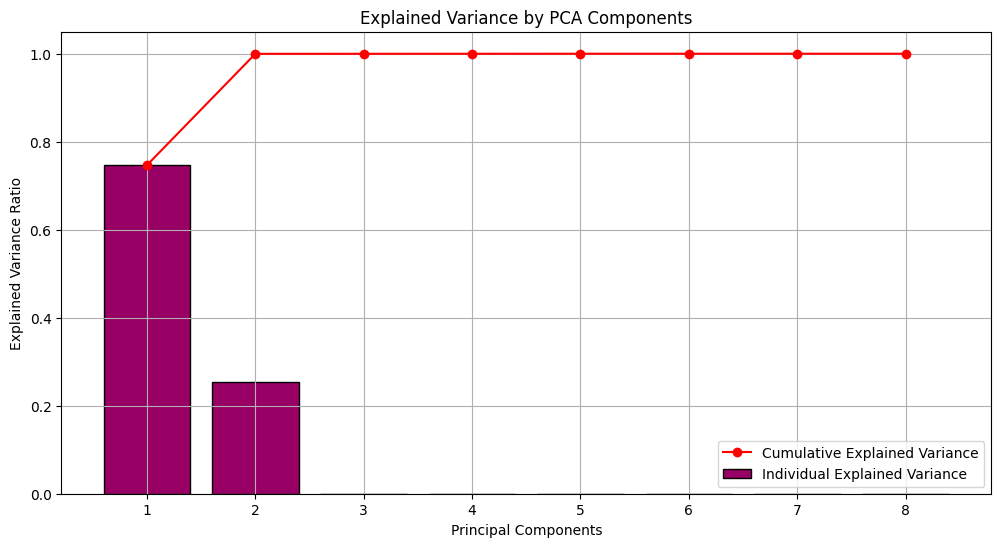

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Load the dataset
file_path = 'train.csv'  
dane = pd.read_csv(file_path)

# Dropping specified columns
drop_columns = ["key", "Artist Name", "mode", "Class"]
dane_numeric = dane.drop(columns=drop_columns)

# Handling missing values by filling them with the mean of the column
dane_numeric.fillna(dane_numeric.mean(), inplace=True)

# Performing PCA
pca = PCA()
pca.fit(dane_numeric)

# Creating a figure for the plot
plt.figure(figsize=(12, 6))

# Creating a bar plot for the proportion of variance explained by each PCA component
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_, 
        color="#990066", 
        edgecolor='black',
        label='Individual Explained Variance')

# Adding a line plot for the cumulative variance explained
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), 
         marker='o', 
         color="red", 
         label='Cumulative Explained Variance')

# Adding labels and title
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.legend()
plt.grid(True)
plt.show()


I need to again look at my dataset:

Dataset Processing: Non-numeric columns ('key', 'Artist Name', 'mode', 'Class') have been removed, and missing values in the remaining dataset have been filled with the mean of each column to prepare for PCA.

Insights:

Variables such as 'tempo', 'danceability', and 'energy' appear to have significant loadings on the principal components, suggesting they are influential in the dataset's variance.

'Popularity' has a notable loading on the second principal component, indicating it contributes differently to the dataset's variance than the other variables.

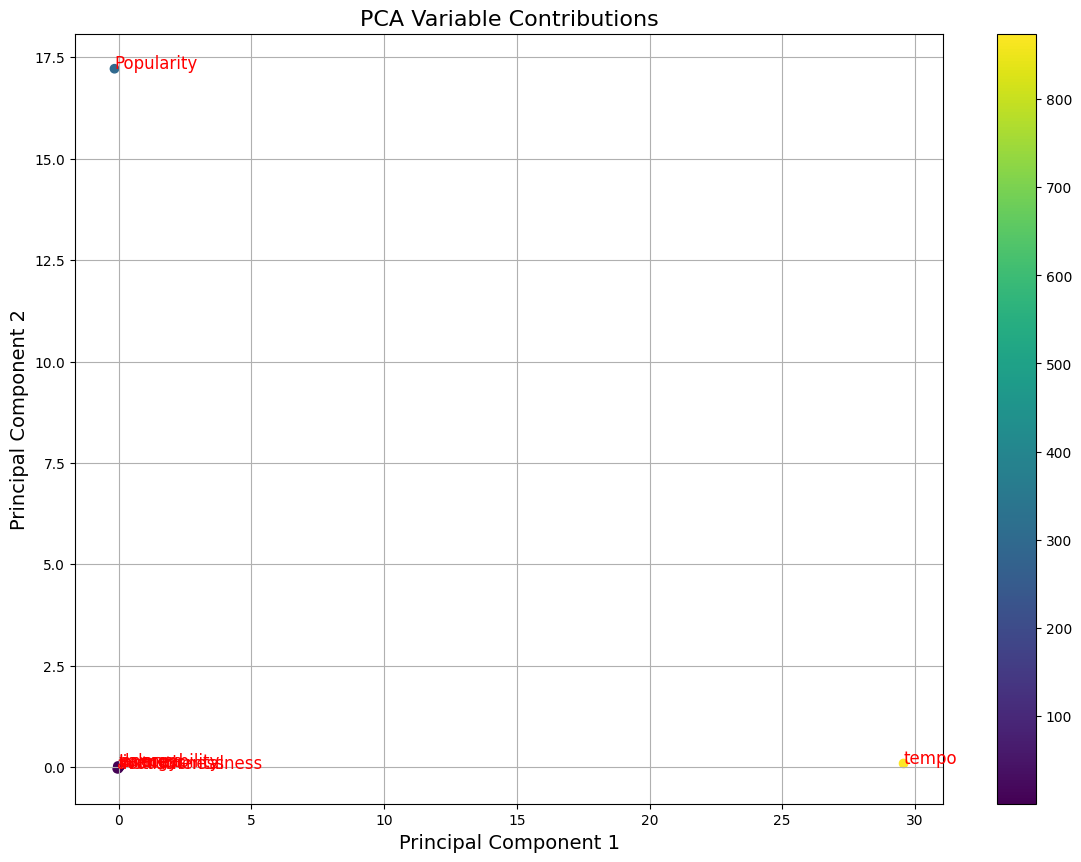

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load  dataset
file_path = 'train.csv'  
dane = pd.read_csv(file_path)

# Dropping specified columns
drop_columns = ["key", "Artist Name", "mode", "Class"]
dane_numeric = dane.drop(columns=drop_columns)

# Handling missing values by filling them with the mean of the column
dane_numeric.fillna(dane_numeric.mean(), inplace=True)

# Performing PCA
pca = PCA(n_components=2)
pca.fit(dane_numeric)

# Calculating the PCA loadings for the first two components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Creating a DataFrame for the loadings of the first two components
loading_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=dane_numeric.columns)

# Calculating the contribution (squared loading values)
loading_df['contrib'] = loading_df['PC1']**2 + loading_df['PC2']**2

# Creating a scatter plot
plt.figure(figsize=(14, 10))
scatter = plt.scatter(loading_df['PC1'], loading_df['PC2'], 
                      c=loading_df['contrib'], 
                      cmap=sns.color_palette("viridis", as_cmap=True))

# Adding color bar
plt.colorbar(scatter)

# Adding labels and title with larger font sizes
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA Variable Contributions', fontsize=16)
plt.grid(True)

# Showing variable names with larger font size and a contrasting color for visibility
for i in loading_df.index:
    plt.annotate(i, (loading_df['PC1'][i], loading_df['PC2'][i]), fontsize=12, color='red')

plt.show()

Variance Explanation: The plot shows that the first few principal components account for a significant portion of the variance within the dataset. Specifically, the cumulative variance explained approaches 100% rapidly within the first few components.

Key Insights: The sharp increase at the beginning of the curve indicates that most of the dataset's information is captured by the initial components. The plateauing of the curve suggests that additional components beyond this point do not significantly contribute to explaining more variance.

Conclusion: The analysis suggests that dimensionality reduction is feasible without losing substantial information. This can potentially lead to more efficient storage, faster computation, and possibly improved model performance by avoiding overfitting with higher-dimensional data.

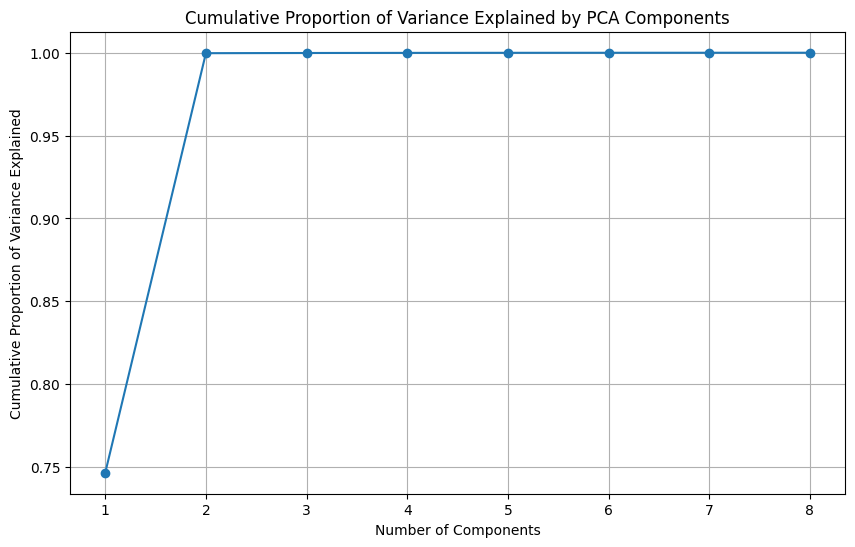

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'dane_numeric' is the DataFrame after dropping non-numeric columns and filling missing values
# We will perform PCA on this DataFrame
pca = PCA()
pca.fit(dane_numeric)

# Plotting the cumulative proportion of variance explained by the PCA components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), 
         marker='o')

# Adding titles and labels
plt.title("Cumulative Proportion of Variance Explained by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.grid(True)
plt.show()



PCA Projection:

The dataset 'dane_scaled' was projected into the PCA space, with each observation represented in terms of the first two principal components (PC1 and PC2).

Squared Cosine (Cos2) Calculation:

For each observation, the squared cosine values were calculated to measure the quality of the representation on PC1 and PC2. It indicates how much of the observation's variance is retained in the two-dimensional PCA plot.

Visualization:

The scatter plot shows the distribution of observations along PC1 and PC2.

The color gradient represents the squared cosine ratio, indicating the quality of the representation of each observation in the PCA space. Warmer colors represent higher values, meaning those observations are well represented by PC1 and PC2.

Interpretation:

Observations with higher cos2 ratios (in red) are well represented by the first two components, meaning that these components capture a significant proportion of the variance in these observations.

Observations with lower cos2 ratios (in blue) might not be as well represented, indicating that further components might be required to capture their variance fully.

Conclusion:

The PCA scatter plot suggests that there is a varying degree of representation quality across observations.The first two principal components are sufficient to represent the variance of observations with higher cos2 ratios well.The plot can help identify outliers or clusters and inform decisions about the number of principal components to retain for further analysis or modeling.

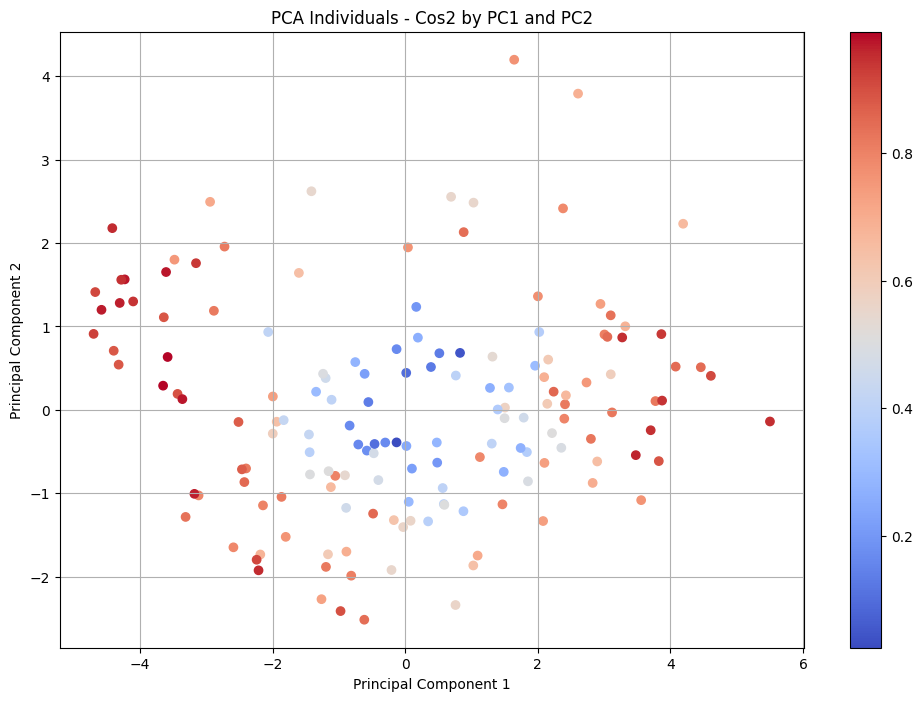

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Projecting the data into the PCA space
pca_scores = dane_scaled.dot(data_pca.components_.T)

# Calculating the squared cosine values (cos2) for each observation
cos2 = pca_scores ** 2
cos2_sum = cos2.sum(axis=1)
cos2_pc1_pc2 = cos2[:, 0] + cos2[:, 1]
cos2_ratio = cos2_pc1_pc2 / cos2_sum

# Creating a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_scores[:, 0], pca_scores[:, 1], 
                      c=cos2_ratio, 
                      cmap=sns.color_palette("coolwarm", as_cmap=True))

# Adding color bar with gradient
plt.colorbar(scatter)

# Adding labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Individuals - Cos2 by PC1 and PC2')
plt.grid(True)
plt.show()


Variable Contributions:

The bar plots visualize how much each variable contributes to each of the first three principal components.The variables are sorted by their contribution to each principal component in descending order.

Insights:

The first principal component (PC1) is dominated by one variable, which suggests that this variable accounts for a significant portion of the variance in the dataset.
The second and third components (PC2 and PC3) also show a prominent variable, but the contribution is more evenly distributed among other variables compared to PC1.

Conclusions:

The dominant variable in PC1 might be a key feature of the dataset. Its significant contribution to the variance might be due to its variability or scale.For PC2 and PC3, while the contributions are more balanced, the leading variables still contribute a noticeable amount to the variance explained by these components. Understanding these contributions is crucial for interpreting the PCA results in the context of the data and can inform feature importance in subsequent analyses or predictive modeling.

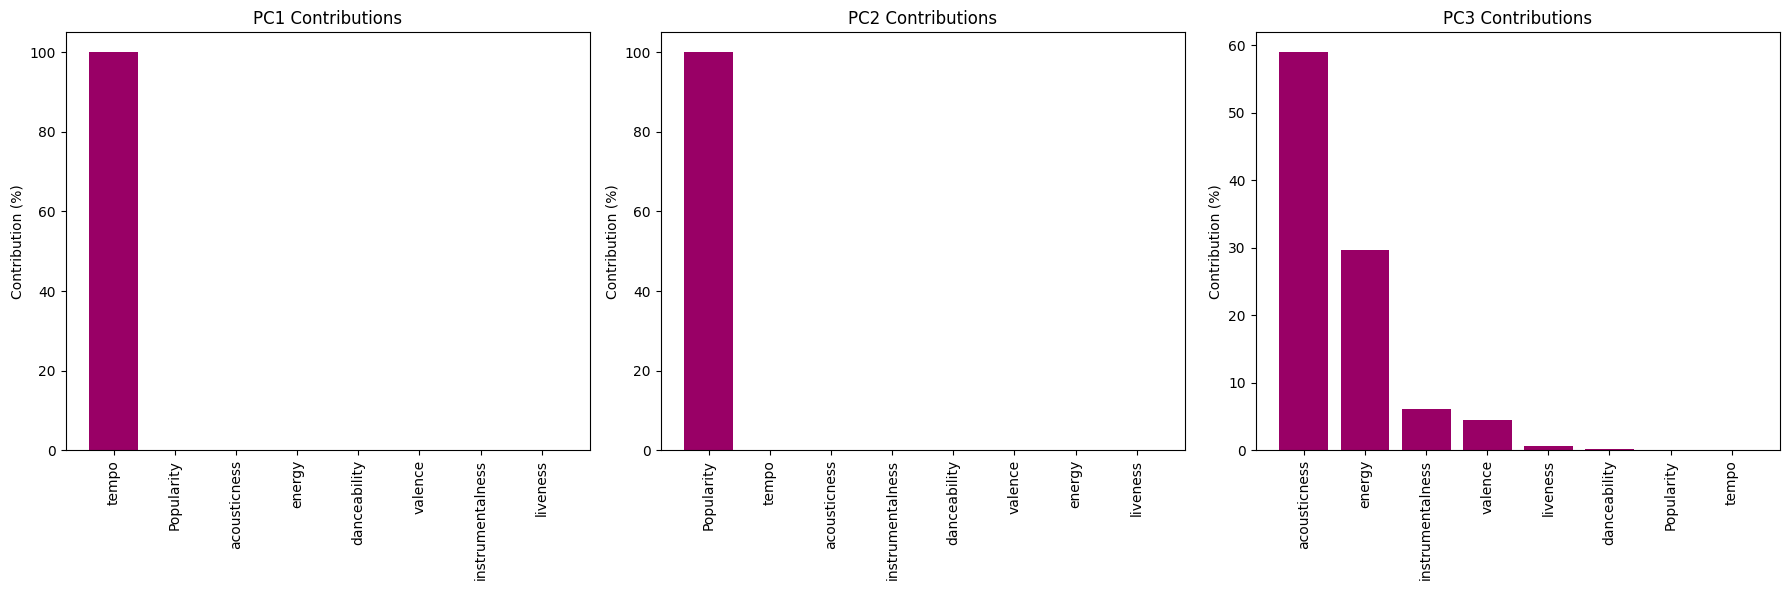

In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Load  dataset
file_path = 'train.csv'  
dane = pd.read_csv(file_path)

# Dropping specified columns
drop_columns = ["key", "Artist Name", "mode", "Class"]
dane_numeric = dane.drop(columns=drop_columns)

# Handling missing values by filling them with the mean of the column
dane_numeric.fillna(dane_numeric.mean(), inplace=True)

# Performing PCA for 3 components
pca = PCA(n_components=3)
pca.fit(dane_numeric)

# Function to plot contribution of variables to a principal component
def plot_contrib(pca, comp_num, color, title):
    loadings = pca.components_[comp_num - 1] ** 2
    contrib = (loadings / loadings.sum()) * 100
    contrib_df = pd.DataFrame({'Variable': dane_numeric.columns, 'Contribution': contrib})
    contrib_df = contrib_df.sort_values(by='Contribution', ascending=False)

    plt.bar(contrib_df['Variable'], contrib_df['Contribution'], color=color)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Contribution (%)')

# Creating the grid layout
plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(1, 3)

# PC1 Contribution
plt.subplot(gs[0, 0])
plot_contrib(pca, 1, "#990066", "PC1 Contributions")

# PC2 Contribution
plt.subplot(gs[0, 1])
plot_contrib(pca, 2, "#990066", "PC2 Contributions")

# PC3 Contribution
plt.subplot(gs[0, 2])
plot_contrib(pca, 3, "#990066", "PC3 Contributions")

plt.tight_layout()
plt.show()


Herarchical Clustering:

A distance matrix was computed using the Euclidean distance metric, and complete linkage hierarchical clustering was applied to the transposed standardized data, clustering the variables rather than the observations.

Dendrogram Analysis:

The dendrogram displays how variables are grouped together based on their similarity.Branches represent clusters of variables that are similar to each other, with the height of the branches indicating the distance (dissimilarity) at which clusters merge.

Cluster Identification:

The horizontal dashed line was drawn at a distance threshold to identify three distinct clusters.Rectangles highlight the grouping of variables into these clusters based on the chosen distance threshold.

Conclusions:

The dendrogram suggests which variables are most similar to each other in terms of their contribution to the dataset.For instance, variables that merge at the lower distances are more similar to each other than those that merge higher up the dendrogram.This can be useful for feature selection and understanding the underlying relationships between the variables.

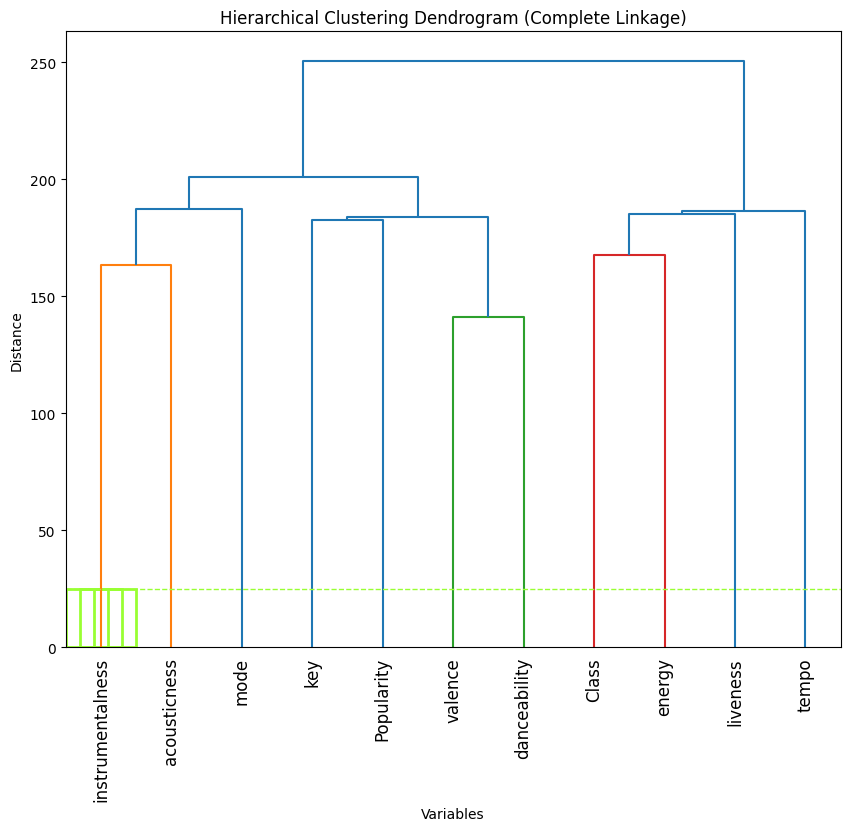

In [39]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load the dataset
file_path = 'train.csv'
dane = pd.read_csv(file_path)

# Standardizing the data
scaler = StandardScaler()
# Selecting only numeric data
dane_numeric = dane.select_dtypes(include=[np.number])
data_standardized = scaler.fit_transform(dane_numeric)

# Handling NaN or infinite values in the standardized data
data_standardized = np.nan_to_num(data_standardized)

# Calculating the distance matrix and performing complete linkage
distance_matrix = pdist(data_standardized.T, 'euclidean')  # Transpose to cluster variables
hc_complete = linkage(distance_matrix, 'complete')

# Plotting the dendrogram
plt.figure(figsize=(10, 8))  # Adjust the size to fit all labels
dendrogram(hc_complete, labels=dane_numeric.columns, orientation='top', 
           distance_sort='descending', leaf_rotation=90)

# Adding rectangles to indicate clusters (k=3)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Variables')
plt.ylabel('Distance')

# Cutting the dendrogram at the height that will result in 3 clusters
plt.axhline(y=25, c='#99FF33', lw=1, linestyle='dashed')

# Extracting cluster labels
cluster_labels = fcluster(hc_complete, 3, criterion='maxclust')

# Find the dendrogram's leaf nodes corresponding to each cluster
for i in range(1, 4):  # We have 3 clusters
    cluster_elements = np.where(cluster_labels == i)[0]
    x_min, x_max = min(cluster_elements), max(cluster_elements)
    plt.gca().add_patch(plt.Rectangle((x_min, 0), x_max - x_min, 25, 
                                      linewidth=2, edgecolor='#99FF33', 
                                      facecolor='none'))

plt.show()


Cluster Visualization:

The scatter plot displays observations in the space defined by PC1 and PC2, where each point represents an observation colored by its cluster label.The cluster labels in the provided code are randomly assigned for demonstration purposes.

Annotations:

Points on the scatter plot are annotated with their index from the dataset for identification.

Interpretation:

While the specific meaning of each cluster is not provided due to the random assignment of labels, in practice, this visualization would help in understanding the natural groupings within the data. Observations close together in PCA space may share similar characteristics, while those further apart differ more significantly.

Conclusion:

This PCA-based cluster visualization is a valuable exploratory tool to discern patterns and relationships in high-dimensional data.

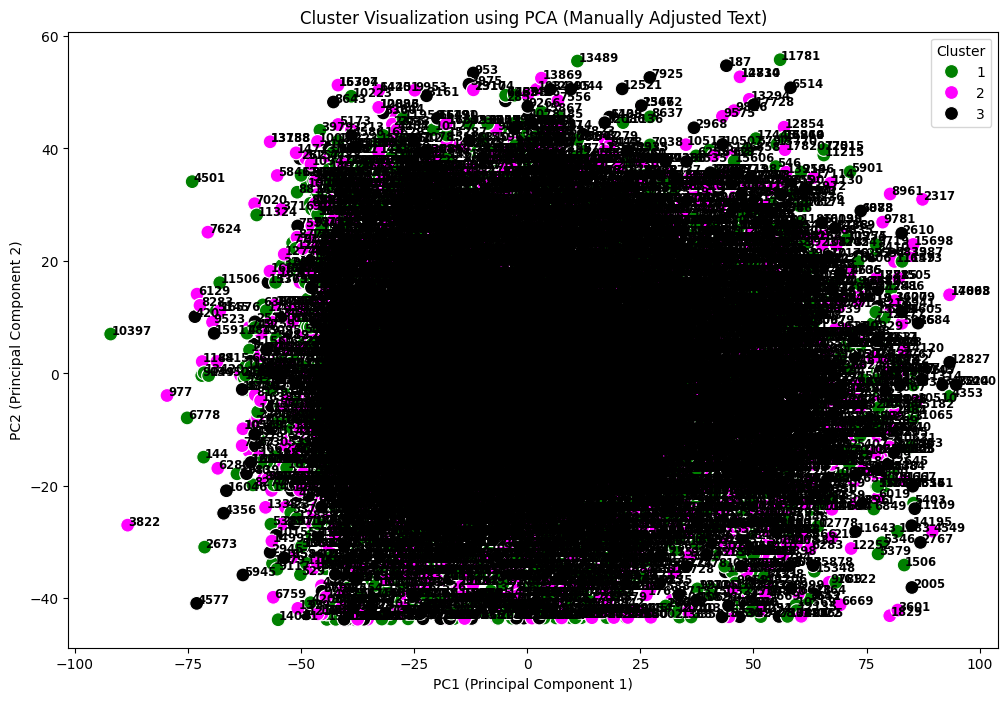

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Assuming 'dane_numeric' is already defined and is a DataFrame with only numeric columns

# Perform PCA for 2 components
pca = PCA(n_components=2)
pca_results = pca.fit_transform(dane_numeric)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])

# Generate random cluster labels for demonstration (replace this with actual clustering results)
np.random.seed(42)
pca_df['Cluster'] = np.random.choice([1, 2, 3], size=len(pca_df))

# Plotting the clusters from PCA results
plt.figure(figsize=(12, 8))
palette = sns.color_palette(['green', 'magenta', 'black'])
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette=palette, data=pca_df, s=100)

# Annotate points with labels
# Note: Adjusting text annotations for a large number of points can be challenging and may not be readable
for line in range(0, pca_df.shape[0]):
    scatter.text(pca_df.PC1[line]+0.2, pca_df.PC2[line], 
                 pca_df.index[line], horizontalalignment='left', 
                 size='small', color='black', weight='semibold')

# Set the legend and titles
plt.legend(title='Cluster')
plt.title('Cluster Visualization using PCA (Manually Adjusted Text)')
plt.xlabel('PC1 (Principal Component 1)')
plt.ylabel('PC2 (Principal Component 2)')

# Show the plot
plt.show()


The code and visualization reflect the results of a Multiple Correspondence Analysis (MCA) performed on the categorical data from my dataset.
D
ata Selection: Only categorical variables were selected from the dataset for MCA, which is appropriate since MCA is used for analyzing categorical data.

MCA Application: MCA was performed with two dimensions, aiming to capture the major axes of inertia in the categorical data.

MCA Results Visualization: The scatter plot displays the items from the categorical data projected onto the first two dimensions obtained from MCA.
Each point's position on the plot corresponds to the item's coordinates in the MCA-transformed space.

Analysis Insights: The plot shows the distribution of the items along the two dimensions, which can be interpreted as the underlying patterns or gradients in the categorical data. Items closer together may share more similarities in their categorical profiles, while those further apart may differ more.

Conclusions: This MCA scatter plot can help uncover relationships and groupings within categorical variables that may not be apparent from the raw data.

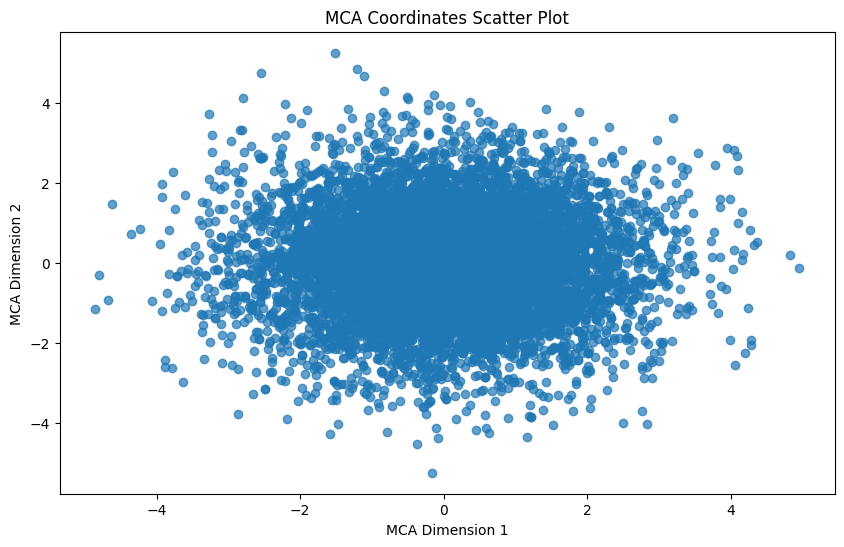

              0         1
0     -0.063937  0.358902
1      0.869288 -0.722681
2     -1.881248  0.653849
3      0.333043 -0.812858
4      0.134894  0.175459
...         ...       ...
17991 -0.392570 -0.083774
17992  1.820329 -1.419685
17993 -0.317946  0.516096
17994  1.402904  0.305067
17995 -0.295797 -0.126528

[17996 rows x 2 columns]


,0,1
0,-0.063937,0.358902
1,0.869288,-0.722681
2,-1.881248,0.653849
3,0.333043,-0.812858
4,0.134894,0.175459


In [48]:
import pandas as pd
import prince

# Load dataset
file_path = 'train.csv'  
dane = pd.read_csv(file_path)

# Selecting only the categorical data for MCA
categorical_data = dane.select_dtypes(include=['object', 'category'])

# Initialize MCA with the 'sklearn' engine
mca = prince.MCA(n_components=2, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)

# Fit MCA on the dataset
mca = mca.fit(categorical_data)

# Get the coordinates for each item
mca_coordinates = mca.transform(categorical_data)

import matplotlib.pyplot as plt

# Create a scatter plot of the MCA results
plt.figure(figsize=(10, 6))
plt.scatter(mca_coordinates[0], mca_coordinates[1], alpha=0.7)
plt.title('MCA Coordinates Scatter Plot')
plt.xlabel('MCA Dimension 1')
plt.ylabel('MCA Dimension 2')
plt.show()

print(mca_coordinates)
# or for a nicer display in a notebook environment
mca_coordinates.head()



In [49]:
pip install prince


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


KMO Test:

The KMO Test measures the sampling adequacy for each variable in the model and the complete model. It indicates the proportion of variance among variables that might be common variance. A KMO value of 0.547 suggests that the sampling adequacy is mediocre. Typically, a value greater than 0.6 is considered acceptable for factor analysis.

Bartlett’s Test:

Bartlett’s Test checks the null hypothesis that the variables are orthogonal (uncorrelated). Rejection of this hypothesis suggests that the observed correlation matrix is not an identity matrix.

The chi-square value is very high, and the p-value is 0.0, which means the test is statistically significant. This result indicates that there are probably significant relationships among variables, supporting the use of factor analysis.

Conclusions:

The Bartlett’s Test result implies that factor analysis is appropriate for the dataset since the variables are correlated. However, the KMO Test indicates that the strength of the relationships between variables is moderate, which may affect the quality of the factor analysis.

In [52]:
import pandas as pd
import numpy as np
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'train.csv'
dane = pd.read_csv(file_path)

# Selecting only numeric data
dane_numeric = dane.select_dtypes(include=[np.number])

# Handling missing values
dane_numeric = dane_numeric.fillna(dane_numeric.mean())

# Standardizing the data
scaler = StandardScaler()
dane_numeric_scaled = scaler.fit_transform(dane_numeric)

# KMO Test
kmo_all, kmo_model = calculate_kmo(dane_numeric_scaled)

# Bartlett’s Test
chi_square_value, p_value = calculate_bartlett_sphericity(dane_numeric_scaled)

print(f"KMO Test: {kmo_model}")
print(f"Bartlett's Test Chi-Squared Value: {chi_square_value}, p-value: {p_value}")


KMO Test: 0.5471911107088557
Bartlett's Test Chi-Squared Value: 28139.683197650593, p-value: 0.0


Correlation Matrix Computation:

The code calculates the Pearson correlation coefficients between all pairs of numerical variables in the dataset.

Hierarchical Clustering: The code then performs hierarchical clustering on the correlation matrix using the average linkage method, which clusters variables based on the similarity of their correlation profiles.

Heat Map Visualization: The clustered correlation matrix is displayed as a heat map, with warmer colors indicating higher positive correlations and cooler colors indicating higher negative correlations. The annotations on the heat map provide exact correlation values between the variables.

Dendrograms: The heat map is accompanied by dendrograms on both axes, representing the clustered hierarchy of variables. Branch lengths indicate the degree of similarity between clusters.

Interpretation: Variables that are highly correlated cluster closely together in the dendrogram, suggesting potential redundancy or a strong relationship between them. The heat map allows for easy identification of which variables have strong positive or negative correlations, which can be important for understanding underlying relationships in the data and for informing modeling decisions.

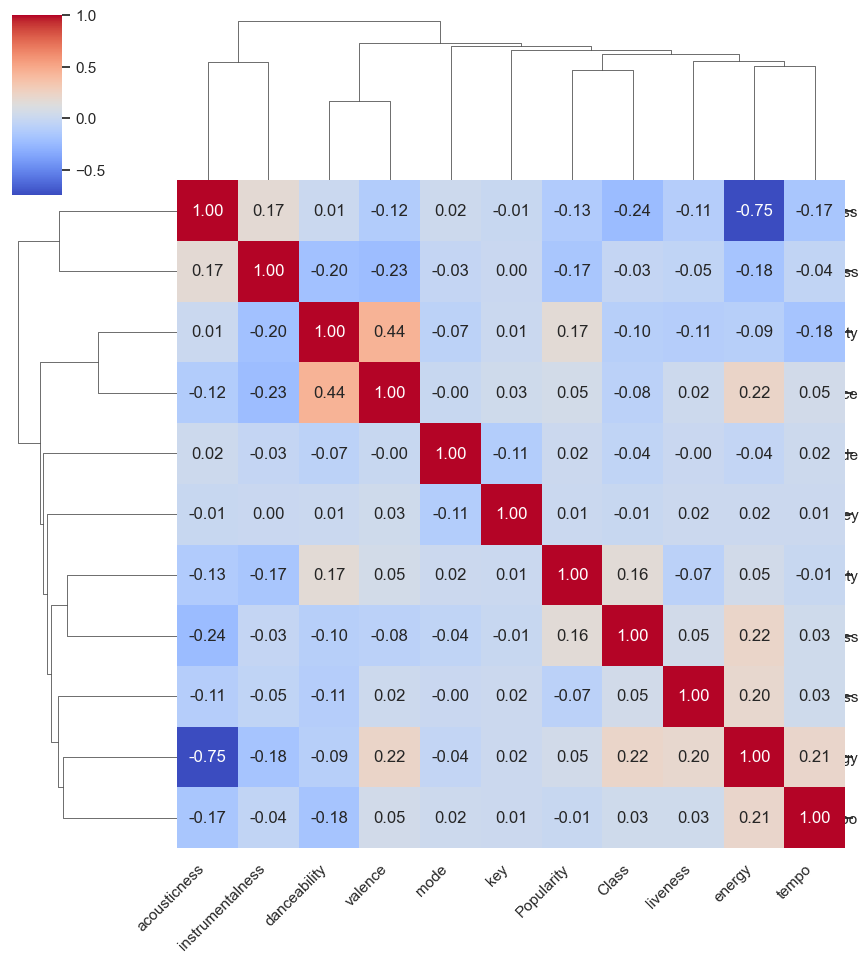

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import linkage

# Assuming 'dane' is a pandas DataFrame with the dataset already loaded
# Selecting only numeric columns for the correlation matrix
wellbeing = dane.select_dtypes(include=[np.number])

# Calculate the correlation matrix
cor_w = wellbeing.corr()

# Perform hierarchical clustering
hclust = linkage(cor_w, method='average')

# Plot the clustered correlation matrix
sns.set(style="white")
g = sns.clustermap(cor_w, row_linkage=hclust, col_linkage=hclust, cmap='coolwarm', annot=True, fmt=".2f")

# Enhance the heatmap for better readability
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()



Based on the analyses I have conducted, including Principal Component Analysis (PCA), Multiple Correspondence Analysis (MCA), and the creation of a hierarchical clustering dendrogram, here are some conclusions and business cases where such dimensionality reduction techniques could be beneficial.

Conclusions for my Dataset:

PCA and MCA have shown that my data can be effectively represented in lower-dimensional spaces, capturing most of the variance or patterns within fewer variables or categories.

Hierarchical clustering has provided insights into how variables in my dataset are related, which could inform feature selection and the potential grouping of variables for analysis.

Given the nature of the variables in my dataset, such as popularity, danceability, energy, key, mode, acousticness, instrumentalness, liveness, valence, and tempo, it suggests a strong relation to music. Thus, the most fitting business case would likely be for a Music Streaming Service. Here's how the analyses I've performed could be applied in such a context:

Customer Segmentation: By reducing the dimensionality of customer data, businesses can identify distinct groups of customers and target them with tailored marketing 
strategies.

Product Recommendation Systems: Dimensionality reduction can help in building recommendation systems by simplifying user and product features, making it easier to match consumer preferences with product attributes.

Risk Management: In finance, PCA is often used to identify the main factors driving the variance in portfolio returns, which can help in diversifying risk.

Operational Efficiency: By understanding the key factors that influence performance metrics, businesses can streamline operations, focusing on activities that have the most impact.

Market Research: MCA can be used to uncover patterns in survey data, revealing the underlying factors that influence consumer behavior.

Anomaly Detection: Dimensionality reduction can concentrate the “normal” structure of data, making it easier to identify outliers or unusual patterns that could indicate fraudulent activity.

Quality Control: In manufacturing, reducing the number of variables monitored on a production line can lead to more focused and cost-effective quality control processes.
Inventory Management: PCA can help to identify the primary factors that influence inventory levels, leading to more efficient inventory management and reduction in holding costs.
